# Dog Breed Analysis
![alt text](puppytraining.jpeg "Title")
1. Data cleaning
2. EDA
3. Recommendation System
    - Euclidian distance
    - PCA with K mean clustering
    - matrix factorization
4. Compare

In [645]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [646]:
df = pd.read_csv("dog_data.csv")

In [647]:
df.head(1)

,Unnamed: 0,dog,height,weight,life_expectancy,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,...,Mental Stimulation Needs,popularity_rank,color,marking,breed_info,health,grooming,excercise,training,nutrition
0,0,Affenpinscher,9-11.5 inches,7-10 pounds,12-15 years,3,3,3,3,3,...,3,148 of 202,Belge-Black-Black & Silver-Black & Tan-Red,Black Mask,"Loyal, curious, and famously amusing, this alm...",Owning a dog is not just a privilege; it’s a r...,"Affenpinschers are generally healthy dogs, and...","The Affenpinscher's medium-length, wiry coat s...",One of the attractions of the toy breeds is th...,"Affenpinschers are courageous, bold, and often..."


In [648]:
df.columns

Index(['Unnamed: 0', 'dog', 'height', 'weight', 'life_expectancy',
       'Affectionate With Family', 'Good With Young Children',
       'Good With Other Dogs', 'Shedding Level', 'Coat Grooming Frequency',
       'Drooling Level', 'Coat Type', 'Coat Length', 'Openness To Strangers',
       'Playfulness Level', 'Watchdog/Protective Nature', 'Adaptability Level',
       'Trainability Level', 'Energy Level', 'Barking Level',
       'Mental Stimulation Needs', 'popularity_rank', 'color', 'marking',
       'breed_info', 'health', 'grooming', 'excercise', 'training',
       'nutrition'],
      dtype='object')

### 1. Data Cleaning
#### cleaning height, weight, life expectancy and poplarity ranking

In [649]:
# Let's do data cleaning for height, weight, life expectancy, popularity ranking
def is_number(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

def hwl_clean(height): # height weight life clean
    height = str(height)
    height_list = height.split('-')
    result = []
    for word in height_list:
        result = result + word.split(" ")
    avg_val = 0
    count = 0
    for i in result:
        if is_number(i):
            count = count +1
            avg_val = avg_val + float(i)
    if count != 0:
        avg_val = avg_val / count
        return avg_val
    else:
        return 0

df['height_c'] = df['height'].apply(hwl_clean)
df['weight_c'] = df['weight'].apply(hwl_clean)
df['life_c'] = df['life_expectancy'].apply(hwl_clean)
df.drop(['height','weight','life_expectancy'], axis = 1,inplace = True)

In [650]:
df[['height_c','weight_c','life_c']].isnull().sum()
# we are missing 10,20,2 values from height, weight and life respectively

height_c    10
weight_c    20
life_c       2
dtype: int64

#### cleaning popularity

In [651]:
# Let's do data cleaning for popularity
def popular_clean(pop):
    if type(pop) == float:
        return np.nan
    else:
        rank_list = pop.split(" of ")
        measure = int(rank_list[0]) / int(rank_list[1])
        return 1 - measure

df['popularity_rank_c']= df['popularity_rank'].apply(popular_clean)
df.drop('popularity_rank', axis = 1, inplace = True)
df['Coat Length'].value_counts()

Short           121
Medium          104
Long             37
Short-Medium      6
Medium-Long       3
Short-Long        1
Name: Coat Length, dtype: int64

#### cleaning coat length. minize the categories to long, medium and short then change it to numeric value.

In [652]:
# Coat Length has to be cleaned
df[df['Coat Length'] == 'Short-Long']
def coatLen_clean(coat):
    if type(coat) != float:
        if "Long" in coat:
            return 3
        elif "Medium" in coat:
            return 2
        else:
            return 1
    else:
        return np.nan

df["Coat_Length_c"] = df["Coat Length"].apply(coatLen_clean)
df.drop("Coat Length", axis = 1, inplace= True)

#### Cleaning coat type

In [653]:
coat_dict = {}
for i in df["Coat Type"]:
    if type(i) != float:
        coat_list = i.split('-')
        for coat in coat_list:
            if coat not in coat_dict:
                coat_dict[coat] = 1
            else:
                coat_dict[coat] = coat_dict[coat] + 1

new_dict = dict(sorted(coat_dict.items(), key=lambda item: item[1], reverse= True))
new_dict

{'Double': 130,
 'Smooth': 102,
 'Wiry': 35,
 'Wavy': 25,
 'Silky': 21,
 'Curly': 17,
 'Rough': 11,
 'Corded': 4,
 'Hairless': 3}

In [654]:
def coat_clean(coat):
    if type(coat) != float:
        if 'Double' in coat:
            return 'Double'
        elif 'Smooth' in coat:
            return 'Smooth'
        elif 'Wiry' in coat:
            return 'Wiry'
        elif 'Silky' in coat:
            return 'Silky'
        elif 'Curly' in coat:
            return 'Curly'
        elif 'Rough' in coat:
            return 'Rough'
        elif 'Corded' in coat:
            return 'Corded'
        elif 'Hairless' in coat:
            return 'Hairless'
    else:
        return np.nan
df['coat_c'] = df['Coat Type'].apply(coat_clean)
df.drop("Coat Type", axis = 1, inplace = True)
df.drop("marking", axis = 1, inplace = True)
df.drop("color", axis = 1, inplace = True)

In [655]:
# reorganize in the way that I like to see

df = df[['dog','popularity_rank_c','height_c', 'weight_c', 'life_c','Coat_Length_c', 'coat_c','Affectionate With Family',
       'Good With Young Children', 'Good With Other Dogs', 'Shedding Level',
       'Coat Grooming Frequency', 'Drooling Level', 'Openness To Strangers',
       'Playfulness Level', 'Watchdog/Protective Nature', 'Adaptability Level',
       'Trainability Level', 'Energy Level', 'Barking Level',
       'Mental Stimulation Needs', 'breed_info', 'health', 'grooming',
       'excercise', 'training', 'nutrition']]

In [656]:
mean_val = (df["life_c"].sum() - df["life_c"].max()) / 275
df["life_c"].replace(df["life_c"].max(), mean_val, inplace= True)

### 2. EDA
#### 1) histogram for qunatative data
#### 2) histogram for categorical data

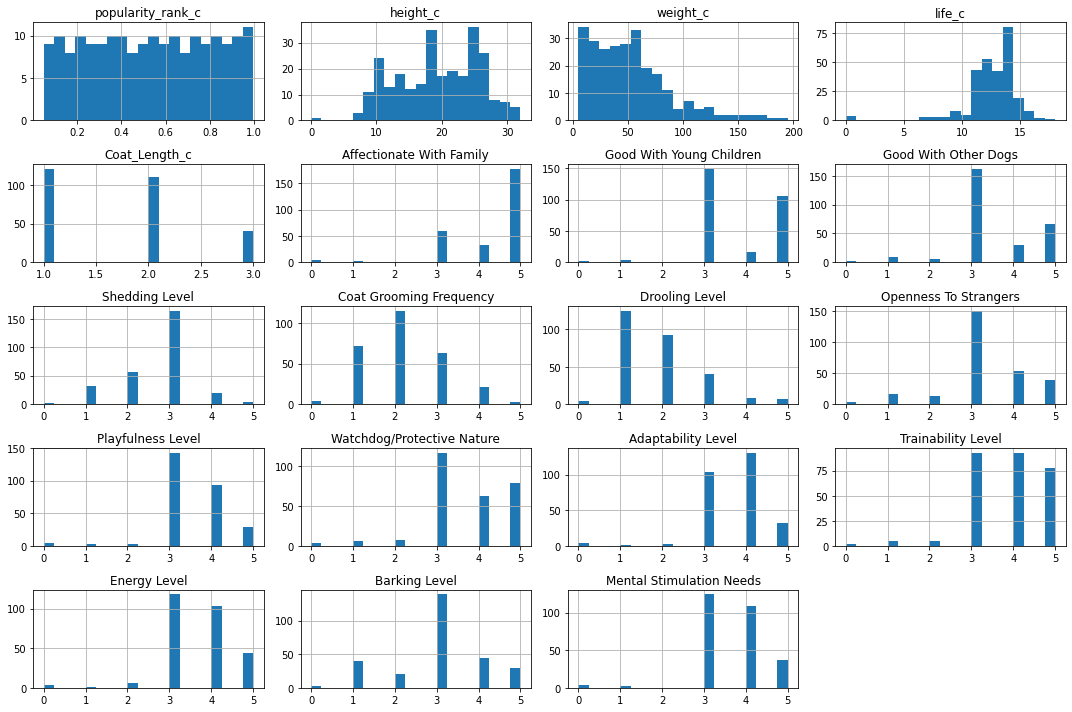

In [657]:
df.hist(bins = 20, figsize = (15,10))
plt.tight_layout()
plt.show()

In [658]:
# numeric_data = df.select_dtypes(include=[np.number])
# categorical_data = df.select_dtypes(exclude=[np.number])
# list(categorical_data.columns)

### 3. Recommendation System
#### Let me start with the most obivous way. "Euclidean distance Recommendation system"
#### there are two ways to use this recommendation system
##### 1) choose the dog you like -> recommend the five other dogs that is similar with the dog you chose
##### 2) answer question about the traits -> recommend the five other dogs that is similar with the dog you chose

In [659]:
# let's choose what columns to include for the eudlidean distance recommendation system
df.columns

Index(['dog', 'popularity_rank_c', 'height_c', 'weight_c', 'life_c',
       'Coat_Length_c', 'coat_c', 'Affectionate With Family',
       'Good With Young Children', 'Good With Other Dogs', 'Shedding Level',
       'Coat Grooming Frequency', 'Drooling Level', 'Openness To Strangers',
       'Playfulness Level', 'Watchdog/Protective Nature', 'Adaptability Level',
       'Trainability Level', 'Energy Level', 'Barking Level',
       'Mental Stimulation Needs', 'breed_info', 'health', 'grooming',
       'excercise', 'training', 'nutrition'],
      dtype='object')

In [660]:
# let's choose 
euclidean_cols = ['height_c', 'weight_c', 'life_c',
       'Coat_Length_c', 'Affectionate With Family',
       'Good With Young Children', 'Good With Other Dogs', 'Shedding Level',
       'Coat Grooming Frequency', 'Drooling Level', 'Openness To Strangers',
       'Playfulness Level', 'Watchdog/Protective Nature', 'Adaptability Level',
       'Trainability Level', 'Energy Level', 'Barking Level',
       'Mental Stimulation Needs']
df_euclidean = df[euclidean_cols]


In [661]:
# let's deal with the outliers for all the columns
df.sort_values(by = 'height_c')
df.sort_values(by = "life_c")
# for height and life_c there are 1,4 zeros values respectively
df[df['height_c'] == 0]['height_c'].count()

def replace_w_mean(df,col,val2replace):
    count_of_val = df[df[col] == val2replace][col].count()
    mean_val = (df[col].sum() - val2replace * count_of_val) / (df[col].count() - count_of_val)
    df[col].replace(val2replace,mean_val,inplace = True)

for col in df_euclidean.columns:
    replace_w_mean(df_euclidean,col,0)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [662]:
# Now let's normalize the dataset
df_euclidean.fillna(df_euclidean.mean(), inplace = True)
df_euclidean
normalized_df_euclidean=(df_euclidean-df_euclidean.min())/(df_euclidean.max()-df_euclidean.min())
normalized_df_euclidean

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,height_c,weight_c,life_c,Coat_Length_c,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,Drooling Level,Openness To Strangers,Playfulness Level,Watchdog/Protective Nature,Adaptability Level,Trainability Level,Energy Level,Barking Level,Mental Stimulation Needs
0,0.147059,0.018421,0.608696,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,1.000000,0.500000,0.500000,0.750000,0.500000,0.500000,0.500000,0.500000
1,0.764706,0.263158,0.739130,1.0,0.500000,0.500000,0.500000,0.000000,0.750000,0.000000,0.500000,0.500000,0.500000,0.500000,0.000000,0.750000,0.500000,0.500000
2,0.647059,0.289474,0.521739,0.5,0.500000,0.500000,0.500000,0.000000,0.500000,0.000000,0.500000,0.500000,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000
3,0.803922,0.578947,0.478261,0.5,0.500000,0.500000,0.000000,0.500000,0.500000,0.000000,0.250000,0.500000,1.000000,0.500000,0.500000,0.750000,0.250000,0.500000
4,0.254902,0.250442,0.695652,0.5,0.500000,0.500000,1.000000,0.500000,0.500000,0.000000,0.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0.470588,0.223684,0.608696,0.5,1.000000,1.000000,0.750000,0.500000,0.250000,0.250000,0.000000,0.500000,0.500000,0.750000,1.000000,0.750000,0.500000,0.750000
272,0.333333,0.078947,0.608696,0.5,1.000000,1.000000,0.500000,0.250000,0.500000,0.250000,1.000000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000
273,0.176471,0.065789,0.652174,0.5,1.000000,1.000000,0.500000,0.500000,0.500000,0.000000,0.750000,1.000000,1.000000,0.750000,0.500000,0.750000,1.000000,0.750000
274,0.647059,0.302632,0.565217,0.5,0.848346,0.698905,0.624088,0.414234,0.286765,0.205882,0.577206,0.631434,0.683824,0.672794,0.713504,0.668498,0.502737,0.661765


In [663]:
from IPython.display import Image, display
def get_idx(df,dog_name):
    return df[df['dog']== dog_name].index.to_list()[0]

def get_names(df,dog_name):
    dist_list = []
    for i in range(df.shape[0]):
        dist_list.append(np.linalg.norm(normalized_df_euclidean.iloc[get_idx(df,dog_name)]-normalized_df_euclidean.iloc[i]))
    idx_list = sorted(range(len(dist_list)), key=lambda i: dist_list[i], reverse=False)[:6]
    return df['dog'][idx_list], 1- (sorted(dist_list)[0:6] / sorted(dist_list)[-1])

def euclidean_by_name(df, dog_name):
    name_list, dis = get_names(df,dog_name)
    for name,d in zip(name_list,dis):
        print(name)
        print(format(d,'.2%'), "simliar to", dog_name)
        display(Image(filename=f'img/{name}.jpg'))

Akita
100.00% simliar to Akita


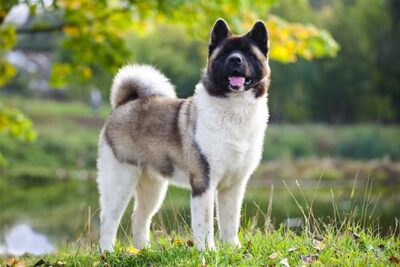

Bouvier-des-Flandres
62.60% simliar to Akita


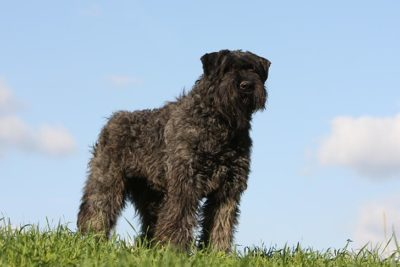

Alaskan-Malamute
60.71% simliar to Akita


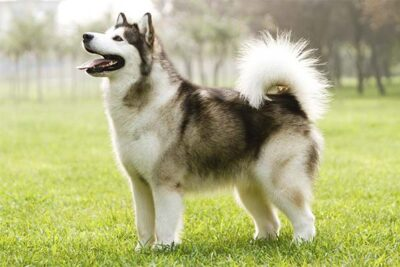

Chow-Chow
60.32% simliar to Akita


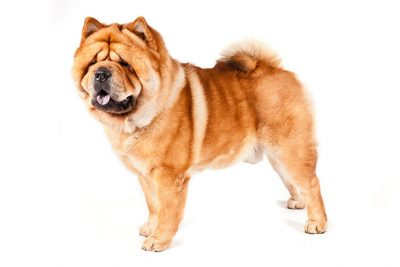

Borzoi
59.31% simliar to Akita


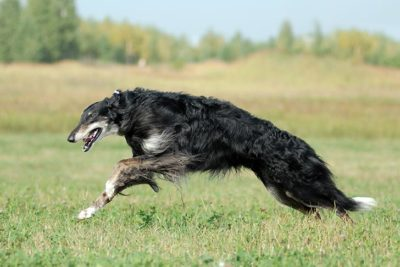

Beauceron
59.19% simliar to Akita


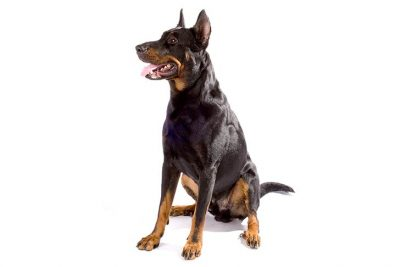

In [664]:
euclidean_by_name(df,"Akita")

In [665]:
print(df_euclidean['height_c'].min(),df_euclidean['height_c'].max(),df_euclidean['weight_c'].min(),df_euclidean['weight_c'].max(),df_euclidean['life_c'].min(),df_euclidean['life_c'].max())

6.5 32.0 5.0 195.0 6.5 18.0


In [669]:
# recommendation based on the answering the questions
questions = ['height_c', 'weight_c', 'life_c',
       'Coat_Length_c', 'Affectionate With Family',
       'Good With Young Children', 'Good With Other Dogs', 'Shedding Level',
       'Coat Grooming Frequency', 'Drooling Level', 'Openness To Strangers',
       'Playfulness Level', 'Watchdog/Protective Nature', 'Adaptability Level',
       'Trainability Level', 'Energy Level', 'Barking Level',
       'Mental Stimulation Needs']
height = float(input("how do you want the height to be(in inches) 6.5 -> 32.0 : "))
height = (height - 6.5) / 32.0
weight = float(input("how do you want the weight to be(in pounds) 5.0 -> 195: "))
weight = (weight - 5) / 195
life = float(input("how long do you want them to live(in years) : "))
life = (life - 6.5)/ 18
coat = float(input("short, medium, long 1/2/3: ")) 
coat = (coat - 1)/3
affection = float(input("ind or lovey-dovey 1->5: "))
affection = (affection - 1) / 5
goodwkid = float(input("good with kid, not recommended to good 1->5: "))
goodwkid = (goodwkid - 1) / 5
goodwdog = float(input("good with other dog, not recommended to good 1->5: "))
goodwdog = (goodwdog - 1) / 5
shedding = float(input("no shedding to a lot of hair 1->5: "))
shedding = (shedding - 1) / 5
grooming = float(input("grooming, monthly to daily 1->5: "))
grooming = (grooming - 1) / 5
drooling = float(input("no drooling to have towel 1 -> 5: "))
drooling = (drooling - 1) / 5
opentostranger = float(input("reserved to open to every one 1->5: "))
opentostranger = (opentostranger - 1) / 5
playfulness = float(input("only when you want to play to Non-stop 1 ->5 :"))
playfulness = (playfulness - 1) / 5
watchdog = float(input("peaceful to watchdog 1 ->5: "))
watchdog = (watchdog - 1) / 5
adaptibility = float(input("routine needed to highly adaptable 1 ->5: "))
adaptibility = (adaptibility - 1) / 5
trainability = float(input("easy to train to difficult to train 1 -> 5: "))
trainability = (trainability - 1) / 5
energy = float(input("easy going to need to run every single second 1->5 :"))
energy = (energy - 1) / 5
barking = float(input("queit dog to loud dog: "))
barking = (barking - 1) / 5
mental = float(input("easy going to need a job asap: 1-> 5: "))
mental = (mental - 1) / 5
profile = [height, weight,life, coat, affection, goodwkid,goodwdog,shedding,grooming,drooling,opentostranger,playfulness,watchdog,adaptibility,trainability,energy,barking,mental]

# get the input and standardize them based on the previously defined largest and smallest value


Mudi
51.21% simliar to


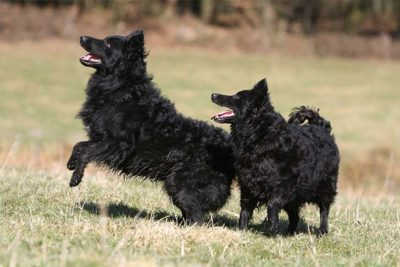

Scottish-Terrier
50.75% simliar to


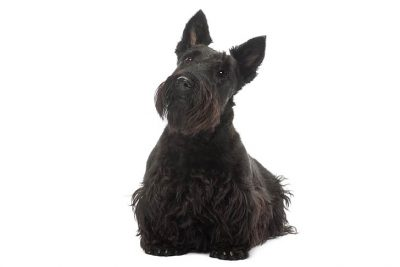

Pumi
50.17% simliar to


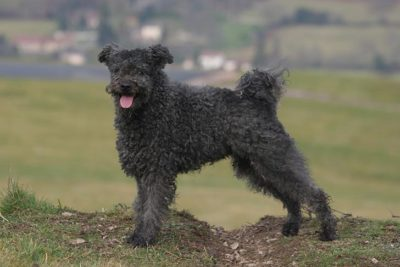

Kerry-Blue-Terrier
48.43% simliar to


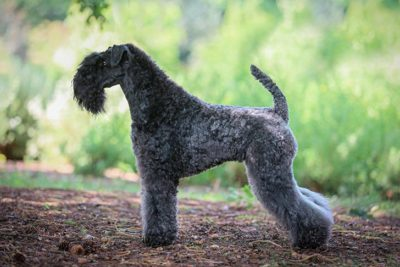

Barbado-da-Terceira
48.07% simliar to


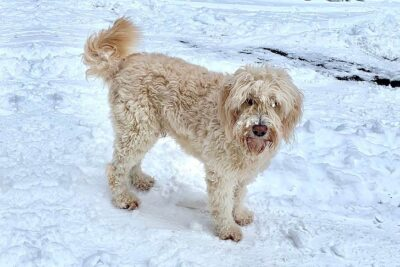

In [671]:
def get_names(df,profile):
    dist_list = []
    for i in range(df.shape[0]):
        dist_list.append(np.linalg.norm(profile-normalized_df_euclidean.iloc[i]))
    idx_list = sorted(range(len(dist_list)), key=lambda i: dist_list[i], reverse=False)[:5]
    return df['dog'][idx_list], 1- (sorted(dist_list)[0:5] / sorted(dist_list)[-1])

def euclidean_by_profile(df, profile):
    name_list, dis = get_names(df,profile)
    for name,d in zip(name_list,dis):
        print(name)
        print(format(d,'.2%'), "matching with profile")
        display(Image(filename=f'img/{name}.jpg'))

euclidean_by_profile(df,profile)

In [151]:
a = ['a','b','c']
a.remove('a')
a

['b', 'c']

In [91]:
df_pca = df.drop(['breed_info', 'health', 'grooming', 'excercise', 'training', 'nutrition'], axis =1) # drop columns with text

print(df_pca.shape)
df_pca.dropna(inplace = True)
print(df_pca.shape)

(276, 21)
(0, 21)


In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [93]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca.drop(['dog','coat_c'], axis = 1))

ValueError: Found array with 0 sample(s) (shape=(0, 19)) while a minimum of 1 is required by StandardScaler.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(
    init="random",
     n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42 )
kmeans.fit(scaled_data)

KMeans(init='random', n_clusters=3, random_state=42)

[0.2132907  0.15888459]


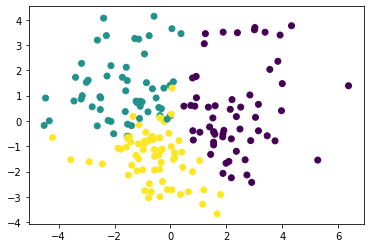

In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_data)
print(pca.explained_variance_ratio_)
plt.scatter(components[:,0],components[:,1], c= kmeans.labels_)

In [ ]:
import plotly.express as px
df1 = components
fig = px.scatter(df1, x=df1[:,0], y=df1[:,1], color = kmeans.labels_, hover_name = df_pca.dog)
fig.show()